# Automobile Dataset Analysis: 

We have a Automobile dataset from Kaggle. The main goal of this notebook is to perform the following task on our Automobile dataset: 

1)Handle missing filed values, such as drop, replace by mean, replace by frequency
2)Correct Data format
3)Standardize Data
4)Normalize Data
5)Perform Binning
6)Add new variables.

## Importing the necessary libraries:

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the dataset:

In [151]:
data = pd.read_csv("C:\\Users\\nuzha\\Desktop\\Auto_Prova.csv")

In [152]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [153]:
data.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
215,1,104,ford,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
216,-1,74,ford,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
217,0,188,Chrysler,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
218,0,93,Chrysler,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
219,2,104,Chrysler,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          220 non-null    int64  
 1   normalized-losses  220 non-null    object 
 2   make               220 non-null    object 
 3   fuel-type          220 non-null    object 
 4   aspiration         220 non-null    object 
 5   num-of-doors       220 non-null    object 
 6   body-style         220 non-null    object 
 7   drive-wheels       220 non-null    object 
 8   engine-location    220 non-null    object 
 9   wheel-base         220 non-null    float64
 10  length             220 non-null    float64
 11  width              220 non-null    float64
 12  height             220 non-null    float64
 13  curb-weight        220 non-null    int64  
 14  engine-type        220 non-null    object 
 15  num-of-cylinders   220 non-null    object 
 16  engine-size        220 non

In [155]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [156]:
data.shape

(220, 26)

In [157]:
type(data)

pandas.core.frame.DataFrame

In [158]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.818182,98.881818,174.386364,65.957273,53.857273,2563.345455,127.054545,10.128727,25.100000,30.600000
std,1.250985,5.929151,12.299359,2.140817,2.433723,515.893009,40.660267,3.919963,6.386272,6.736664
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.200000,52.000000,2190.750000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.200000,173.200000,65.500000,54.100000,2422.500000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2959.250000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Replacing the "?" values with NaN


In [159]:
data.replace("?", np.NaN)
data.dropna(subset = ["price"], axis = 0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1,104,ford,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
216,-1,74,ford,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
217,0,188,Chrysler,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
218,0,93,Chrysler,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176


# DATA WRANGLING

In [160]:
data.replace("?",np.NaN, inplace=True)

### Finding missing data

In [161]:
#checking for anymore missing data
data.isnull().sum()

# using a for loop
for column in data.columns:
    print(column)
    print(data[column].isnull().sum())

symboling
0
normalized-losses
43
make
0
fuel-type
0
aspiration
0
num-of-doors
2
body-style
0
drive-wheels
0
engine-location
0
wheel-base
0
length
0
width
0
height
0
curb-weight
0
engine-type
0
num-of-cylinders
0
engine-size
0
fuel-system
0
bore
4
stroke
4
compression-ratio
0
horsepower
2
peak-rpm
2
city-mpg
0
highway-mpg
0
price
4


From above:
* normalized losses have 41 missing values
* num-of-doors has 2 missing values
* bore has 4 missing values
* horsepower has 2 missing values
* peak-rom has 2 missing values
* price has 4 mising values


### Handling the missing data

In [162]:
# delete all row where price is missing
data.dropna(subset = ["price"], inplace = True, axis = 0)
## reset index
data.reset_index(drop=True, inplace=True)

In [163]:
#replacing empty normalized losses with mean
average_normalized_loss = data["normalized-losses"].astype("float").mean()
data["normalized-losses"].replace(np.nan, average_normalized_loss, inplace = True)

In [164]:
#replacing empty stroke with mean
average_stroke = data["stroke"].astype("float").mean()
data["stroke"].replace(np.nan, average_stroke, inplace = True)

In [165]:
#replacing null values in bore column with the mean
average_bore = data["bore"].astype("float").mean(axis = 0)
data["bore"].replace(np.nan, average_bore, inplace=True)

In [166]:
#replacing null values in horsepower with mean
average_horsepower = data["horsepower"].astype("float").mean()
data["horsepower"].replace(np.nan, average_horsepower, inplace= True)

In [167]:
#replacing null values in peak-rpm with mean
average_horsepower = data["peak-rpm"].astype("float").mean()
data["peak-rpm"].replace(np.nan, average_horsepower, inplace= True)

In [168]:
#replacing null values in num-of-doors with most frequent num-of-do
most_frequent_numofdoor = data["num-of-doors"].value_counts().idxmax()
data["num-of-doors"].replace(np.nan, most_frequent_numofdoor, inplace=True)

In [169]:
#check whether there are any null values after handling missing data
data.isnull().sum().sum()

0

After handling all the missing values, the above code data.isnull().sum().sum() checks to make sure there are no null values left in the dataset.

### Correct data format

In [170]:
#listing data types for each column
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [171]:
# converting the data types to correct format
data[['bore','stroke','price', 'peak-rpm']] = data[['bore','stroke','price', 'peak-rpm']].astype('float')
data['normalized-losses'] = data['normalized-losses'].astype('int')
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data standardization

In [172]:
#standardizing the fuel consumption column(city-mpg) from mpg to l/100km
data["city-L/100km"] = 235/data["city-mpg"]

In [173]:
#standardizing the column, highway-mpg to highway-l/100km
data["highway-L/100km"] = 253/data['highway-mpg']

The script above converts fuel consumption from mpg to L/100km for both city and highway mileage.

### Data normalization

In [174]:
# normalizing width,height and length
data["length"] = data["length"]/data["length"].max() 
data["height"] = data["height"]/data["height"].max()
data["width"] = data["width"]/data["width"].max()

The above code normalizes “length”, “height”, and “width” columns by dividing each value by the maximum value of that particular column.

### Binning 

In [175]:
# converting data to correct format
data["horsepower"] = data["horsepower"].astype("float", copy=True)

Text(0.5, 1.0, 'Horsepower distribution')

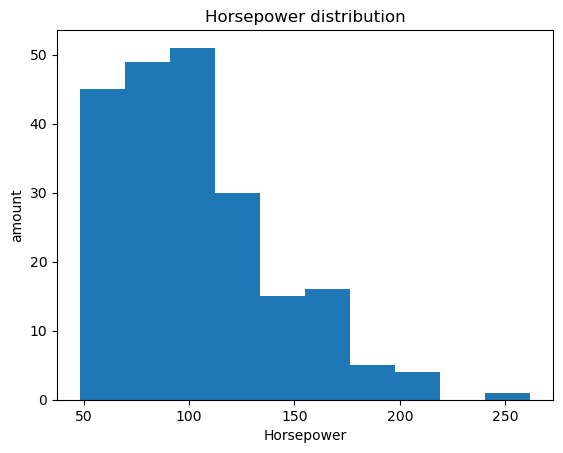

In [176]:
# visualizing horsepower distribution
plt.hist(data["horsepower"])

plt.xlabel("Horsepower")
plt.ylabel("amount")
plt.title("Horsepower distribution")

The script above creates bins for the “horsepower” column and assigns each vehicle to a bin based on its horsepower. It then visualizes this distribution using a histogram.

In [177]:
# constructing the bins
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [178]:
# setting the group names
g_names = ["low","medium","high"]

In [179]:
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=g_names, include_lowest=True )
data[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low


In [180]:
# number of vehicles in each bin
data["horsepower-binned"].value_counts()

low       165
medium     46
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Bin vizualization')

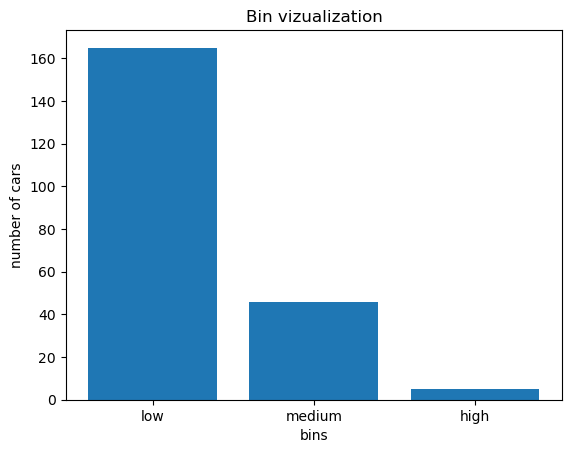

In [181]:
# plotting the distribution of each bin
plt.bar(g_names, data["horsepower-binned"].value_counts())
plt.xlabel("bins")
plt.ylabel("number of cars")
plt.title("Bin vizualization")

A new variable “horsepower-binned” is added to our dataset which categorizes vehicles based on their horsepower “low”, “medium”, or “high”.

### Dummy variables 

In [182]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [183]:
dummy_1 = pd.get_dummies(data["fuel-type"])
dummy_1.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [184]:
# renaming the columns
dummy_1.rename(columns={"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace=True)
dummy_1.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [185]:
# merge data frame and "dummy_1" 
data = pd.concat([data, dummy_1], axis= 1)

# drop initial fuel type from data
data.drop(labels="fuel-type", inplace=True, axis=1)

In [186]:
# saving the new dataframe in my desktop
data.to_csv("C:\\Users\\nuzha\\Desktop\\Result_Auto_Prova.csv")

Thus, we have performed a typical data analysis for our Automobile dataset in Python where we handle missing values, correct data formats, standardize and normalize the data, perform binning, and add new variables for further analysis.